In [36]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc



In [30]:
all_files=[]
import os
for root, dirs, files in os.walk("./data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [31]:
all_files

['./data/valve1/6.csv',
 './data/valve1/7.csv',
 './data/valve1/5.csv',
 './data/valve1/4.csv',
 './data/valve1/0.csv',
 './data/valve1/1.csv',
 './data/valve1/3.csv',
 './data/valve1/2.csv',
 './data/valve1/15.csv',
 './data/valve1/14.csv',
 './data/valve1/10.csv',
 './data/valve1/11.csv',
 './data/valve1/13.csv',
 './data/valve1/12.csv',
 './data/valve1/9.csv',
 './data/valve1/8.csv',
 './data/other/23.csv',
 './data/other/22.csv',
 './data/other/20.csv',
 './data/other/21.csv',
 './data/other/19.csv',
 './data/other/18.csv',
 './data/other/16.csv',
 './data/other/17.csv',
 './data/other/15.csv',
 './data/other/14.csv',
 './data/other/11.csv',
 './data/other/13.csv',
 './data/other/12.csv',
 './data/other/9.csv',
 './data/anomaly-free/anomaly-free.csv',
 './data/valve2/0.csv',
 './data/valve2/1.csv',
 './data/valve2/3.csv',
 './data/valve2/2.csv']

In [32]:
dfs=[]
for path in all_files:
    df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
    dfs.append(df)
print('Features:')
for col in dfs[2].columns:
    print('\t',col)

Features:
	 Accelerometer1RMS
	 Accelerometer2RMS
	 Current
	 Pressure
	 Temperature
	 Thermocouple
	 Voltage
	 Volume Flow RateRMS
	 anomaly
	 changepoint


In [33]:
print(dfs[2].columns)


Index(['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure',
       'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS',
       'anomaly', 'changepoint'],
      dtype='object')


array([1.        , 0.94594595, 0.        ])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 320, number of negative: 603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 923, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346696 -> initscore=-0.633596
[LightGBM] [Info] Start training from score -0.633596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

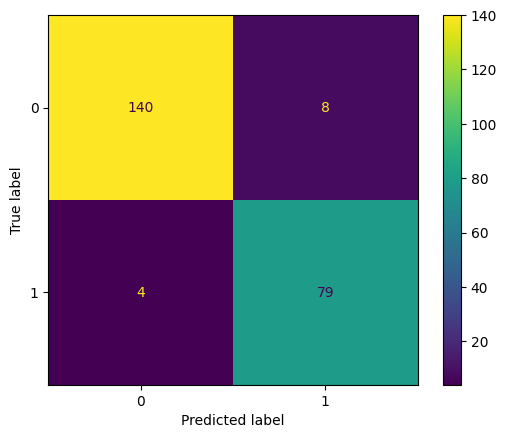

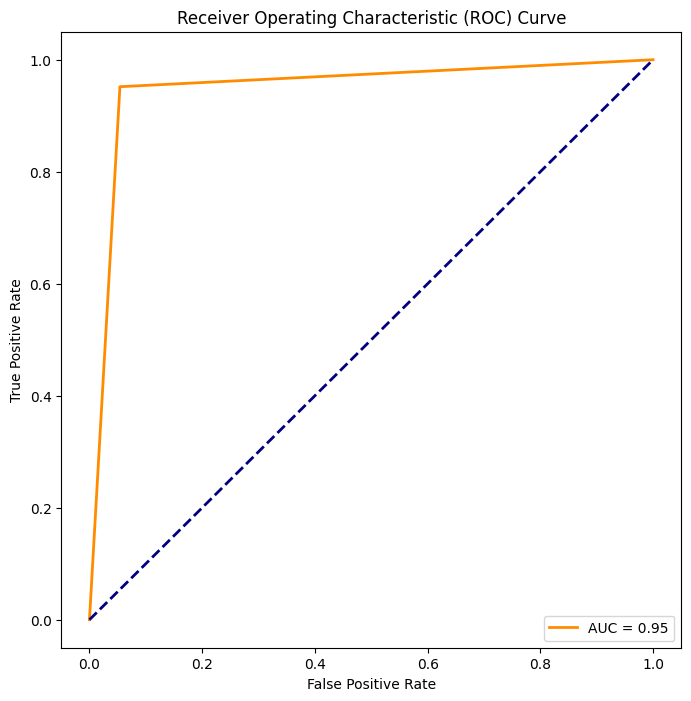

In [47]:
X = dfs[2].drop('anomaly', axis=1)
y = dfs[2]['anomaly']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# LightGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)


y_pred = lgbm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 score: {f1}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Model Accuracy: 0.948051948051948
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 320, number of negative: 603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 923, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346696 -> initscore=-0.633596
[LightGBM] [Info] Start training from score -0.633596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

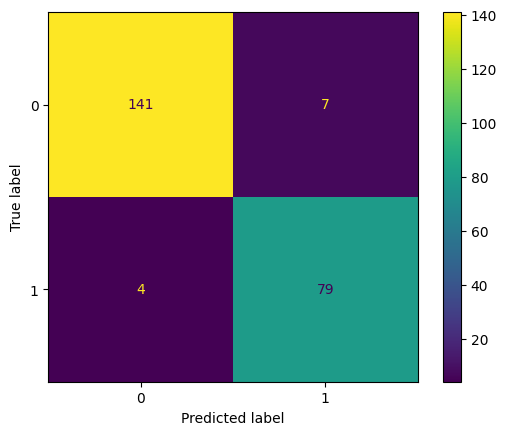

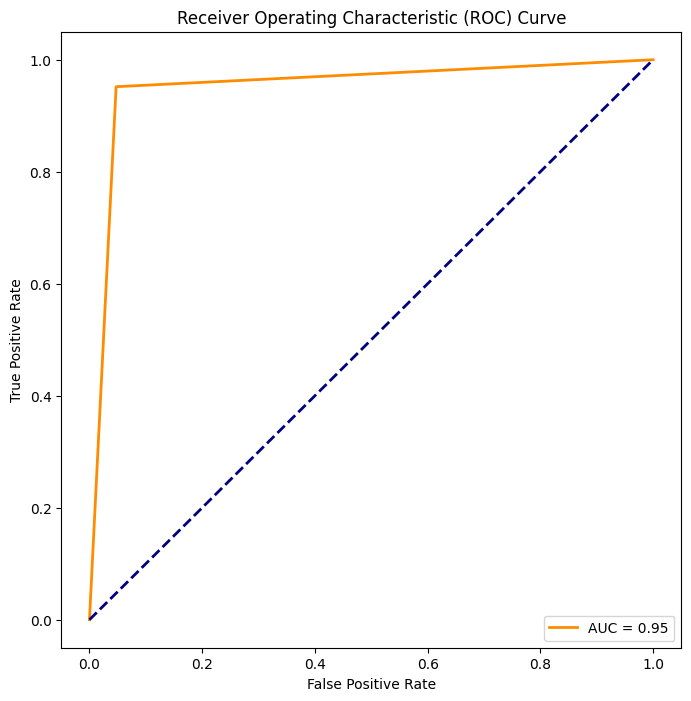

In [49]:
print(f"Model Accuracy: {accuracy}")# 1. Feature Importance Analysis
feature_importances = lgbm_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Select Top Features
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(int(len(feature_names) * 0.85))['feature']

# Using only the top features for training
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


lgbm_model_top = lgb.LGBMClassifier()
lgbm_model_top.fit(X_train_top, y_train)


y_pred_top = lgbm_model_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Model Accuracy with Top Features: {accuracy_top}")

cm = confusion_matrix(y_test, y_pred_top)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_top)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Info] Number of positive: 320, number of negative: 603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 923, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346696 -> initscore=-0.633596
[LightGBM] [Info] Start training from score -0.633596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

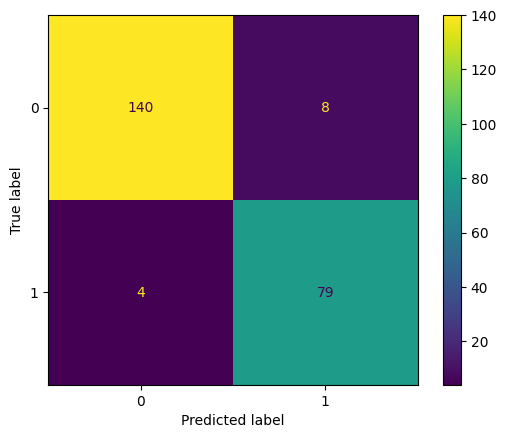

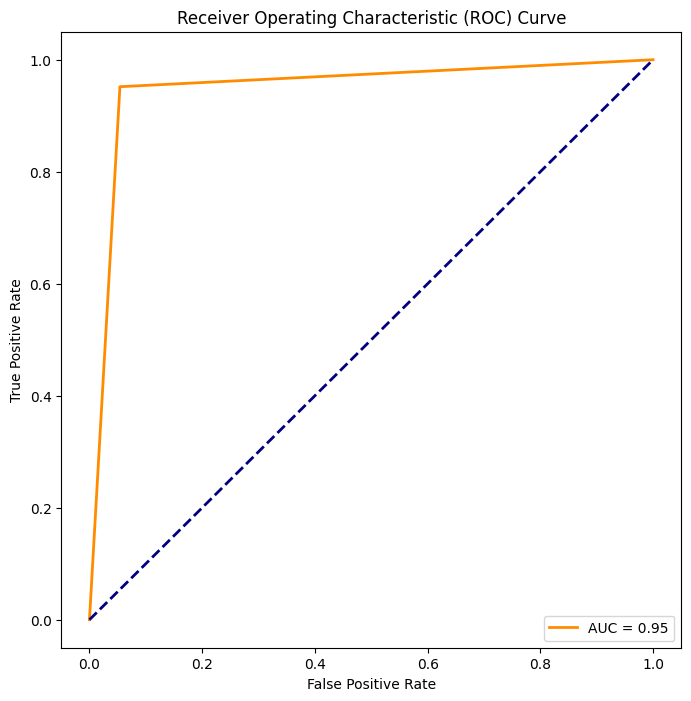

In [50]:
# Normalization
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# Standardization
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Retrain and Evaluate the model with normalized data
lgbm_model_normalized = lgb.LGBMClassifier()
lgbm_model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = lgbm_model_normalized.predict(X_test_normalized)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)

# Retrain and Evaluate the model with standardized data
lgbm_model_standardized = lgb.LGBMClassifier()
lgbm_model_standardized.fit(X_train_standardized, y_train)
y_pred_standardized = lgbm_model_standardized.predict(X_test_standardized)
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)

print(f"Model Accuracy with Normalized Data: {accuracy_normalized}")
print(f"Model Accuracy with Standardized Data: {accuracy_standardized}")

cm = confusion_matrix(y_test, y_pred_standardized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_standardized)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Info] Number of positive: 403, number of negative: 751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10144
[LightGBM] [Info] Number of data points in the train set: 1154, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349220 -> initscore=-0.622469
[LightGBM] [Info] Start training from score -0.622469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

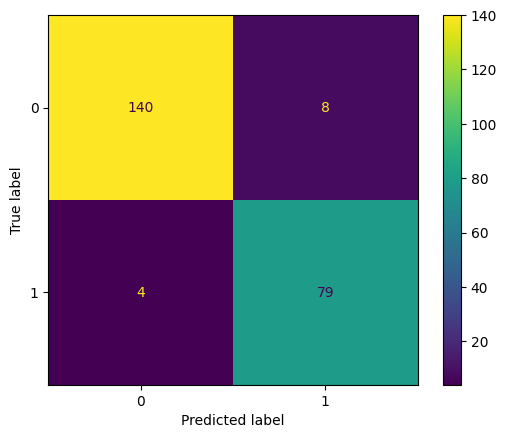

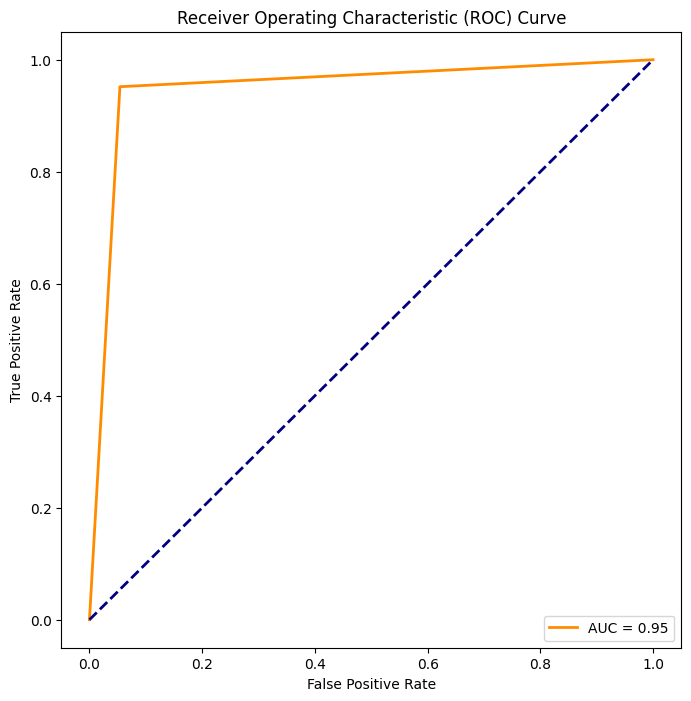

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# RFE - Advanced Feature Selection
rfe = RFE(lgb.LGBMClassifier(), n_features_to_select=10)
X_rfe = rfe.fit_transform(X_poly, y)

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=0)
lgbm_model_combined = lgb.LGBMClassifier()
lgbm_model_combined.fit(X_train, y_train)
y_pred_combined = lgbm_model_combined.predict(X_test)
accuracy_combined = accuracy_score(y_test, y_pred_combined)

print(f"Model Accuracy with Combined Approach: {accuracy_combined}")


cm = confusion_matrix(y_test, y_pred_combined)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_combined)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[LightGBM] [Info] Number of positive: 320, number of negative: 603
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 923, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347779 -> initscore=-0.628816
[LightGBM] [Info] Start training from score -0.628816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

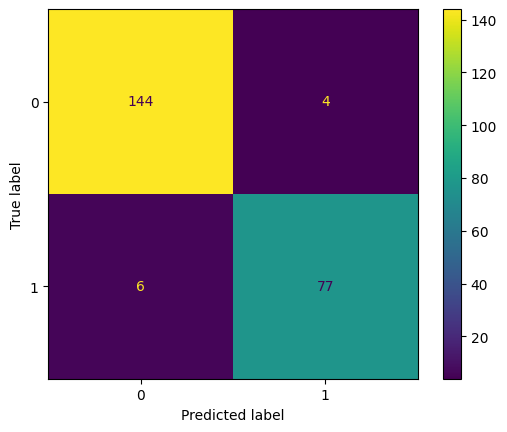

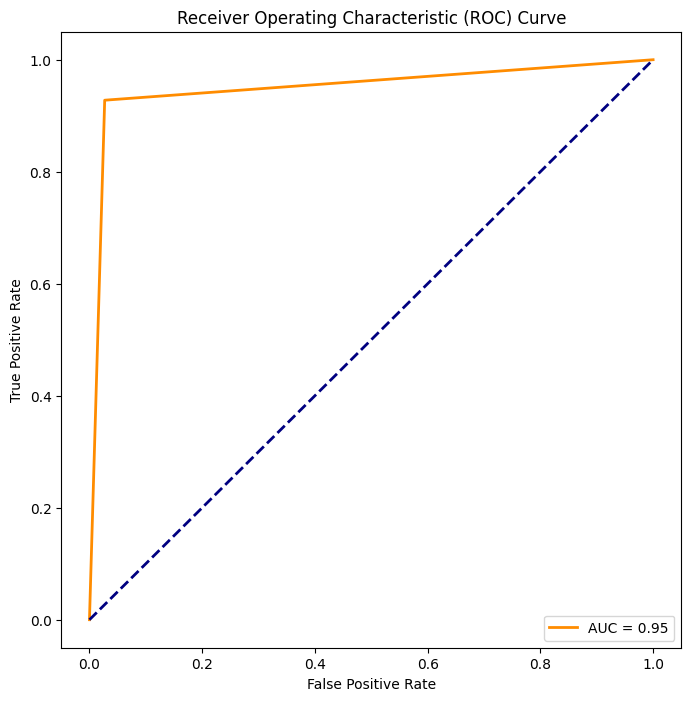

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
lgbm_base = lgb.LGBMClassifier()

# Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=lgbm_base,
                                  n_estimators=50,
                                  random_state=0)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)
f1_bagging = f1_score(y_test, y_pred_bagging)

print(f"Model F1 Score with Bagging: {f1_bagging}")

cm = confusion_matrix(y_test, y_pred_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_bagging)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()